## Load Libraries

### Visualization / Heatmap

In [341]:
#%matplotlib notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [342]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [343]:
mpl.style.use(['seaborn-colorblind'])

### Dataframe and Math Functions

In [344]:
from __future__ import print_function
import numpy as np
import pandas as pd
#!pip install --upgrade pip
#!pip install xlrd

## Load Data And Explore

In [345]:
df_fit = pd.read_csv('2020-09-09 Daily Summaries.csv')
df_fit.tail()

,Date,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
2605,2020-09-05,2696.826674,10222.175941,72.568419,147.627563,48.392181,40.722423,-74.003448,40.744324,-73.975527,...,NaN,NaN,2760000.0,NaN,NaN,NaN,14160000.0,10080000.0,960000.0,NaN
2606,2020-09-06,2481.469955,2773.843985,74.053491,134.696548,45.104023,40.741982,-73.976779,40.743335,-73.975948,...,NaN,NaN,3720000.0,NaN,NaN,NaN,16320000.0,7800000.0,300000.0,NaN
2607,2020-09-07,2575.764029,2788.983181,76.766597,155.392776,50.022659,40.742323,-73.976249,40.743302,-73.974503,...,2104249.0,NaN,12960000.0,NaN,NaN,NaN,7620000.0,6360000.0,780000.0,NaN
2608,2020-09-08,2061.990253,1690.234940,72.473438,119.322861,53.456039,40.743255,-73.975974,40.743296,-73.975947,...,NaN,NaN,9720000.0,NaN,NaN,NaN,10080000.0,5580000.0,900000.0,NaN
2609,2020-09-09,887.248776,322.675220,67.775912,82.836845,49.464417,40.742212,-73.976176,40.743258,-73.975999,...,NaN,NaN,5940000.0,NaN,NaN,NaN,11160000.0,5820000.0,600000.0,NaN


In [346]:
df_fit.head()

,Date,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
0,2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
df_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     2610 non-null   object 
 1   Calories (kcal)                          2428 non-null   float64
 2   Distance (m)                             1938 non-null   float64
 3   Average heart rate (bpm)                 690 non-null    float64
 4   Max heart rate (bpm)                     690 non-null    float64
 5   Min heart rate (bpm)                     690 non-null    float64
 6   Low latitude (deg)                       900 non-null    float64
 7   Low longitude (deg)                      900 non-null    float64
 8   High latitude (deg)                      900 non-null    float64
 9   High longitude (deg)                     900 non-null    float64
 10  Average speed (m/s)                      1731 no

In [348]:
df_fit.describe()

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
count,2428.000000,1938.000000,690.000000,690.000000,690.000000,900.000000,900.000000,900.000000,900.000000,1731.000000,...,4.700000e+01,3.000000e+00,1.200000e+01,1.0,1.100000e+01,1.570000e+02,1.500000e+01,1.500000e+01,1.100000e+01,3.000000
mean,2247.738885,4620.664049,111.953129,150.175902,73.965514,39.498077,-71.560904,39.969200,-70.723908,1.433997,...,2.231003e+06,1.988191e+06,4.695000e+06,1654967.0,2.010573e+06,1.784455e+06,1.190000e+07,7.976000e+06,6.600000e+05,100127.666667
std,589.769101,7098.137575,19.345135,18.798462,15.152202,7.601545,13.775053,6.348149,15.681561,3.056141,...,1.426860e+06,4.419411e+05,3.785245e+06,NaN,6.953297e+05,9.729297e+05,3.749994e+06,3.551637e+06,2.601538e+05,23.797759
min,0.000000,0.000000,63.635036,72.000000,20.000000,0.000000,-87.635437,0.000000,-87.635437,0.000000,...,6.300000e+01,1.589930e+06,1.200000e+05,1654967.0,1.209576e+06,2.270000e+05,3.060000e+06,1.620000e+06,3.000000e+05,100102.000000
25%,2021.707498,2440.901850,102.431913,137.000000,61.000000,40.742313,-73.982470,40.746055,-73.975932,0.659173,...,1.459646e+06,1.750465e+06,2.655000e+06,1654967.0,1.439207e+06,9.000000e+05,1.020000e+07,5.700000e+06,4.800000e+05,100117.000000
50%,2299.008845,4147.818404,115.080929,153.260017,75.000000,40.743039,-73.981756,40.749333,-73.975081,0.915718,...,2.142357e+06,1.911000e+06,3.120000e+06,1654967.0,1.697672e+06,1.637000e+06,1.116000e+07,7.800000e+06,6.600000e+05,100132.000000
75%,2560.548281,5780.266026,126.083890,164.000000,85.000000,40.743456,-73.977646,40.752129,-73.974343,1.330621,...,2.688162e+06,2.187321e+06,6.510000e+06,1654967.0,2.550316e+06,2.695000e+06,1.434000e+07,1.098000e+07,8.400000e+05,100140.500000
max,5787.936138,292370.773208,148.602214,226.000000,114.000000,55.679828,12.584370,55.688120,12.650080,89.422981,...,9.370067e+06,2.463642e+06,1.296000e+07,1654967.0,3.310903e+06,4.638000e+06,1.734000e+07,1.248000e+07,1.080000e+06,100149.000000


In [349]:
df_fit.describe(include='object')

,Date,Blood glucose specimen source
count,2610,219
unique,2610,1
top,2020-08-21,Interstitial fluid
freq,1,219


In [350]:
df_fit.columns

Index(['Date', 'Calories (kcal)', 'Distance (m)', 'Average heart rate (bpm)',
       'Max heart rate (bpm)', 'Min heart rate (bpm)', 'Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Step count', 'Average weight (kg)', 'Max weight (kg)',
       'Min weight (kg)', 'Average systolic blood pressure (mmHg)',
       'Max systolic blood pressure (mmHg)',
       'Min systolic blood pressure (mmHg)',
       'Average diastolic blood pressure (mmHg)',
       'Max diastolic blood pressure (mmHg)',
       'Min diastolic blood pressure (mmHg)', 'Body position',
       'Blood pressure measurement location', 'Average blood glucose (mmol/L)',
       'Max blood glucose (mmol/L)', 'Min blood glucose (mmol/L)',
       'Temporal relation to meal', 'Meal type', 'Temporal relation to sleep',
       'Blood glucose specimen source', 'Move Minutes count',
       'Calories Consumed', 'Hea

In [351]:
df_fit.index

RangeIndex(start=0, stop=2610, step=1)

In [352]:
df_fit.shape

(2610, 55)

In [353]:
df_fit.isnull().sum()

Date                                          0
Calories (kcal)                             182
Distance (m)                                672
Average heart rate (bpm)                   1920
Max heart rate (bpm)                       1920
Min heart rate (bpm)                       1920
Low latitude (deg)                         1710
Low longitude (deg)                        1710
High latitude (deg)                        1710
High longitude (deg)                       1710
Average speed (m/s)                         879
Max speed (m/s)                             879
Min speed (m/s)                             879
Step count                                  617
Average weight (kg)                        1168
Max weight (kg)                            1168
Min weight (kg)                            1168
Average systolic blood pressure (mmHg)     2560
Max systolic blood pressure (mmHg)         2560
Min systolic blood pressure (mmHg)         2560
Average diastolic blood pressure (mmHg) 

## Set Index And Format as Date

In [354]:
df_fit.set_index('Date', inplace=True)

In [355]:
df_fit.index.name = 'Date'

In [356]:
df_fit.head()

,Calories (kcal),Distance (m),Average heart rate (bpm),Max heart rate (bpm),Min heart rate (bpm),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),...,Rowing machine duration (ms),Treadmill running duration (ms),Sleep duration (ms),Stair climbing machine duration (ms),Ergometer duration (ms),Other duration (ms),Light sleeping duration (ms),Deep sleeping duration (ms),Awake mid-sleeping duration (ms),Guided breathing duration (ms)
Date,,,,,,,,,,,,,,,,,,,,,
2012-09-18,1185.313721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,1786.499878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,1339.213242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-22,1778.499743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
df_fit.index = pd.to_datetime(df_fit.index, format='%Y-%m-%d')

## Cleanse Data / Drop NA

In [358]:
df_fit = df_fit[df_fit.index > '2020-05-01']

In [359]:
df_fit.dropna(axis=1, how='all', inplace=True)

## Create Correlation Heat Map and List

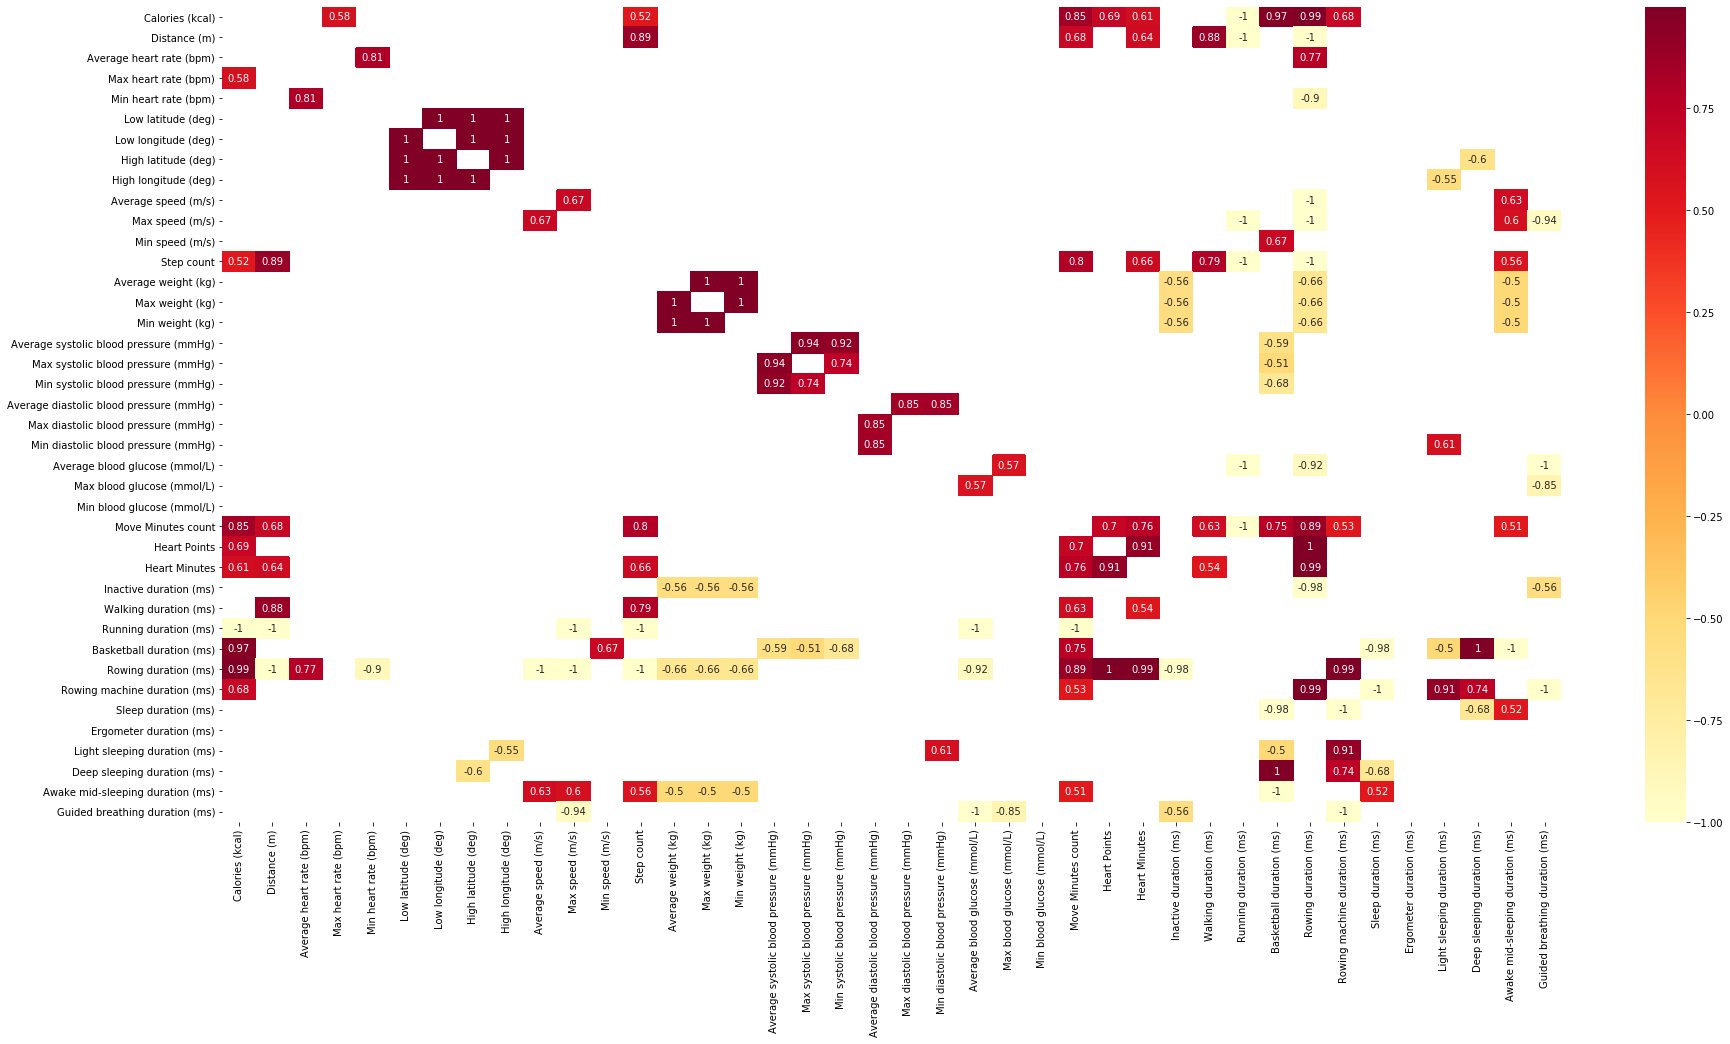

In [360]:
#set data set for analysis
df = df_fit

filterValue = 0.5

corr_fit = df.corr()

filteredDf = corr_fit[((corr_fit >= filterValue) | (corr_fit <= -filterValue)) & (corr_fit !=1.000)]
plt.figure(figsize=(30,15))
sns.heatmap(filteredDf, annot=True, cmap="YlOrRd")
plt.show()

In [361]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corr_fit_filtered = corrFilter(df, filterValue)
half = corr_fit_filtered.count() / 2
corr_fit_filtered

Guided breathing duration (ms)  Rowing machine duration (ms)     -1.000000
Average blood glucose (mmol/L)  Guided breathing duration (ms)   -0.999639
Rowing duration (ms)            Step count                       -0.999498
Basketball duration (ms)        Sleep duration (ms)              -0.981732
Rowing duration (ms)            Inactive duration (ms)           -0.981316
                                                                    ...   
Deep sleeping duration (ms)     Basketball duration (ms)          0.999746
Min weight (kg)                 Max weight (kg)                   0.999953
                                Average weight (kg)               0.999988
Average weight (kg)             Max weight (kg)                   0.999988
Calories (kcal)                 Calories (kcal)                        NaN
Length: 77, dtype: float64

In [362]:
corr_fit_filtered.head(int(half)+1)

Guided breathing duration (ms)          Rowing machine duration (ms)         -1.000000
Average blood glucose (mmol/L)          Guided breathing duration (ms)       -0.999639
Rowing duration (ms)                    Step count                           -0.999498
Basketball duration (ms)                Sleep duration (ms)                  -0.981732
Rowing duration (ms)                    Inactive duration (ms)               -0.981316
Guided breathing duration (ms)          Max speed (m/s)                      -0.943224
Rowing duration (ms)                    Average blood glucose (mmol/L)       -0.916241
Min heart rate (bpm)                    Rowing duration (ms)                 -0.895126
Max blood glucose (mmol/L)              Guided breathing duration (ms)       -0.849706
Basketball duration (ms)                Min systolic blood pressure (mmHg)   -0.683501
Deep sleeping duration (ms)             Sleep duration (ms)                  -0.677209
Max weight (kg)                         Row

In [363]:
corr_fit_filtered.tail(int(half)+1)

Min speed (m/s)                          Basketball duration (ms)                   0.671367
Distance (m)                             Move Minutes count                         0.680417
Rowing machine duration (ms)             Calories (kcal)                            0.680981
Heart Points                             Calories (kcal)                            0.690562
                                         Move Minutes count                         0.699556
Min systolic blood pressure (mmHg)       Max systolic blood pressure (mmHg)         0.740525
Rowing machine duration (ms)             Deep sleeping duration (ms)                0.744435
Basketball duration (ms)                 Move Minutes count                         0.753735
Move Minutes count                       Heart Minutes                              0.757793
Rowing duration (ms)                     Average heart rate (bpm)                   0.767457
Step count                               Walking duration (ms)        

## Averages

In [364]:
def AverageFunction(df, roundValue):
    cleaned = df.dropna()
    return round(sum(cleaned)/len(cleaned), roundValue)

In [365]:
def MedianFunction(df, roundValue):
    import statistics as stat
    cleaned = df.dropna()
    return round(stat.median(cleaned), roundValue)

In [366]:
dia = df['Average diastolic blood pressure (mmHg)']
sys = df['Average systolic blood pressure (mmHg)']
print('BP (medan):', AverageFunction(sys,1), '/', AverageFunction(dia,1))
print('BP (median):',MedianFunction(sys,1), '/', MedianFunction(dia,1))

BP (medan): 124.4 / 80.7
BP (median): 124.5 / 80.0


In [367]:
bg = df['Average blood glucose (mmol/L)']
print('BG (mmol/L):', AverageFunction(bg, 1))
print('BG (mmg/dl):', AverageFunction(bg, 1) * 18)

BG (mmol/L): 7.7
BG (mmg/dl): 138.6


In [368]:
df['SleepSum'] = df['Deep sleeping duration (ms)'] + df['Light sleeping duration (ms)'] + df['Sleep duration (ms)']
df['sleepSumHours'] = df['SleepSum'] / 3600000
print('Sleep:', AverageFunction(df['sleepSumHours'],2))
print('Sleep (Median):', MedianFunction(df['sleepSumHours'], 2))
print('Awake (Mean):', AverageFunction(df['Awake mid-sleeping duration (ms)'], 9) / 3600000)
print('Awake (Median):', MedianFunction(df['Awake mid-sleeping duration (ms)'], 9) / 3600000)

Sleep: 6.8
Sleep (Median): 6.71
Awake (Mean): 0.18333333333333332
Awake (Median): 0.18333333333333332


In [369]:
w = df['Average weight (kg)']
print('Weight (kg):', AverageFunction(w, 1))
print('Weight (lbs):', round(AverageFunction(w, 1) * 2.2),1)


Weight (kg): 103.3
Weight (lbs): 227 1


## Simple Graphs

(5, 10.125713787509897)

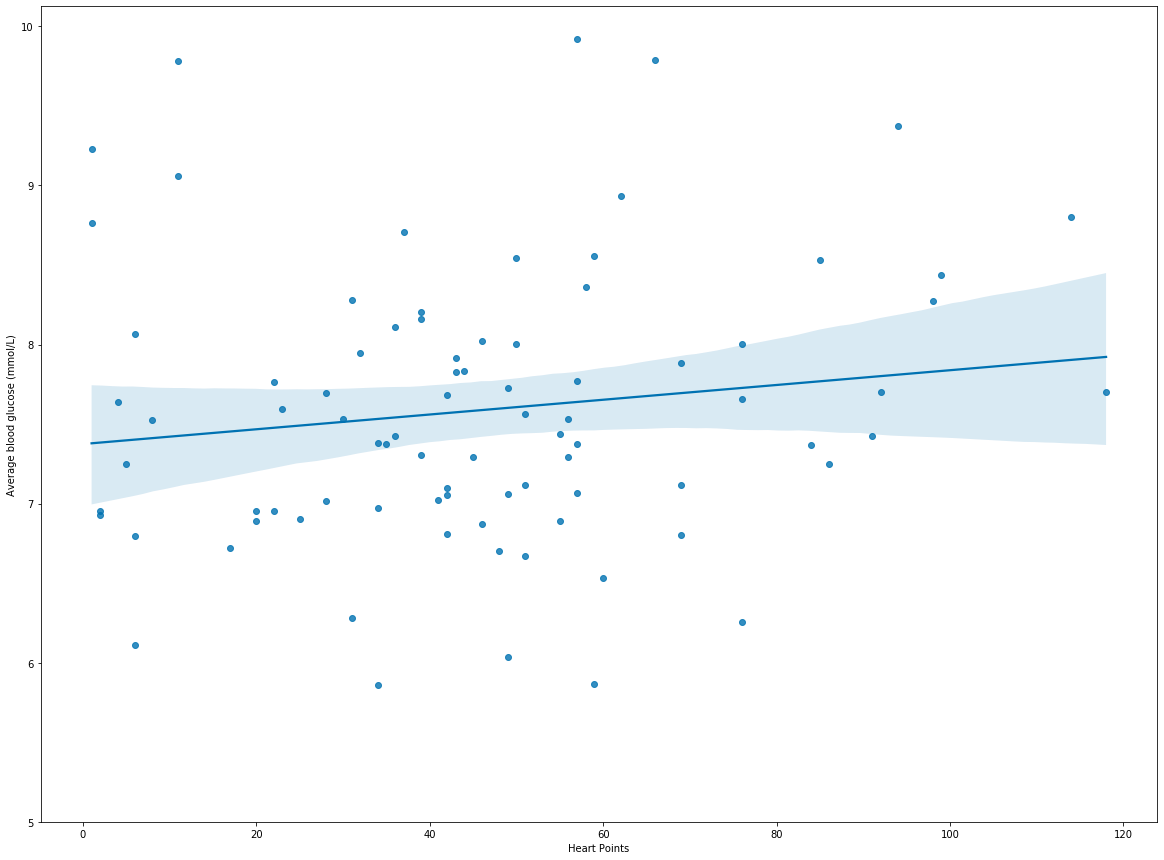

In [370]:
plt.figure(figsize=(20,15))
sns.regplot(x='Heart Points', y='Average blood glucose (mmol/L)', data=df)
plt.ylim(5,)

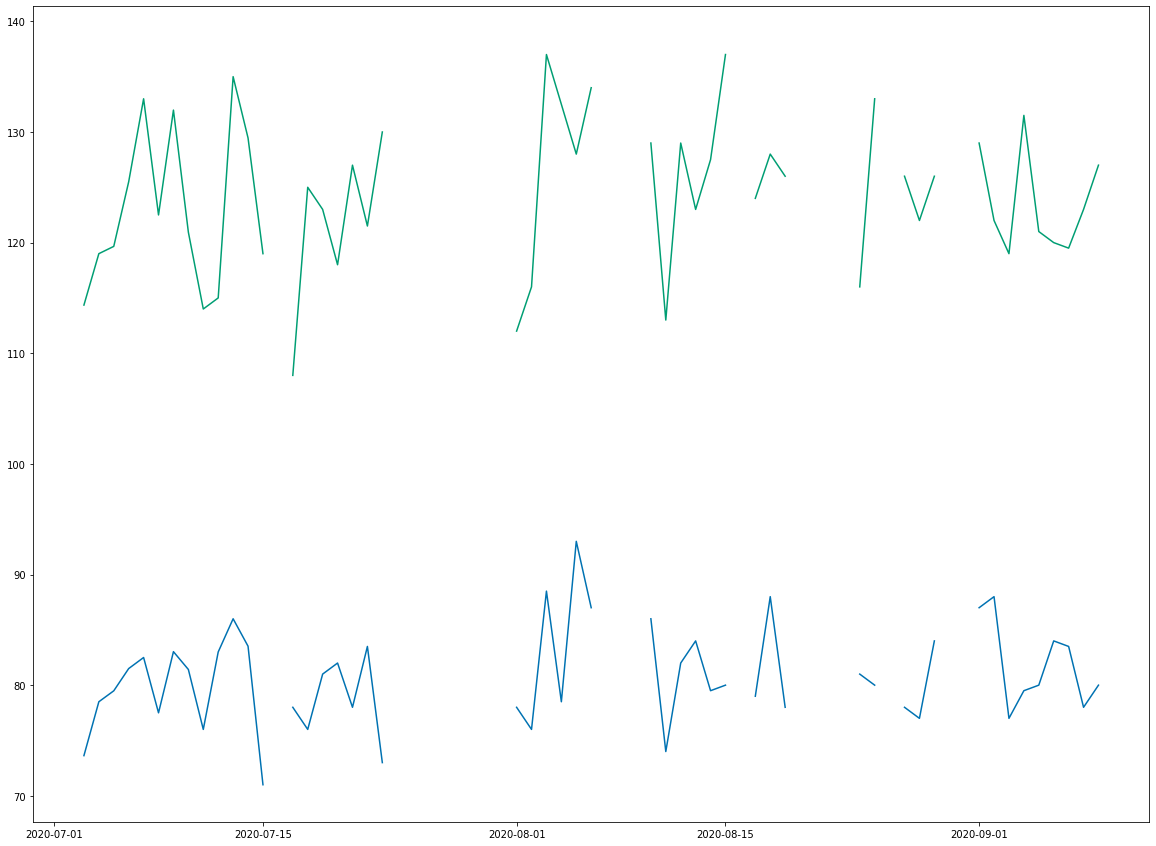

In [371]:

plt.figure(figsize=(20,15))
plt.plot(df.index, df['Average diastolic blood pressure (mmHg)'])
plt.plot(df.index, df['Average systolic blood pressure (mmHg)'])
plt.show()


(100, 105.46685180279617)

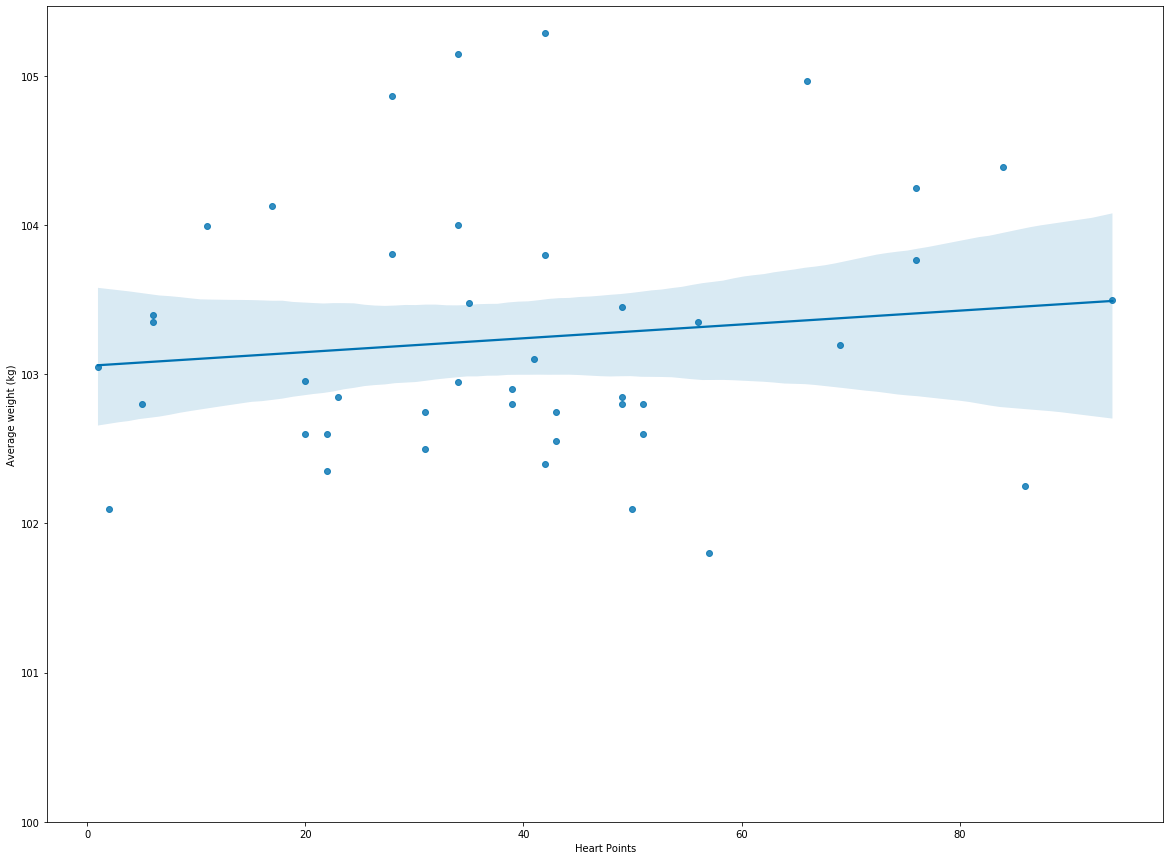

In [372]:
plt.figure(figsize=(20,15))
sns.regplot(x='Heart Points', y='Average weight (kg)', data=df)
plt.ylim(100,)

(102, 105.55116892538322)

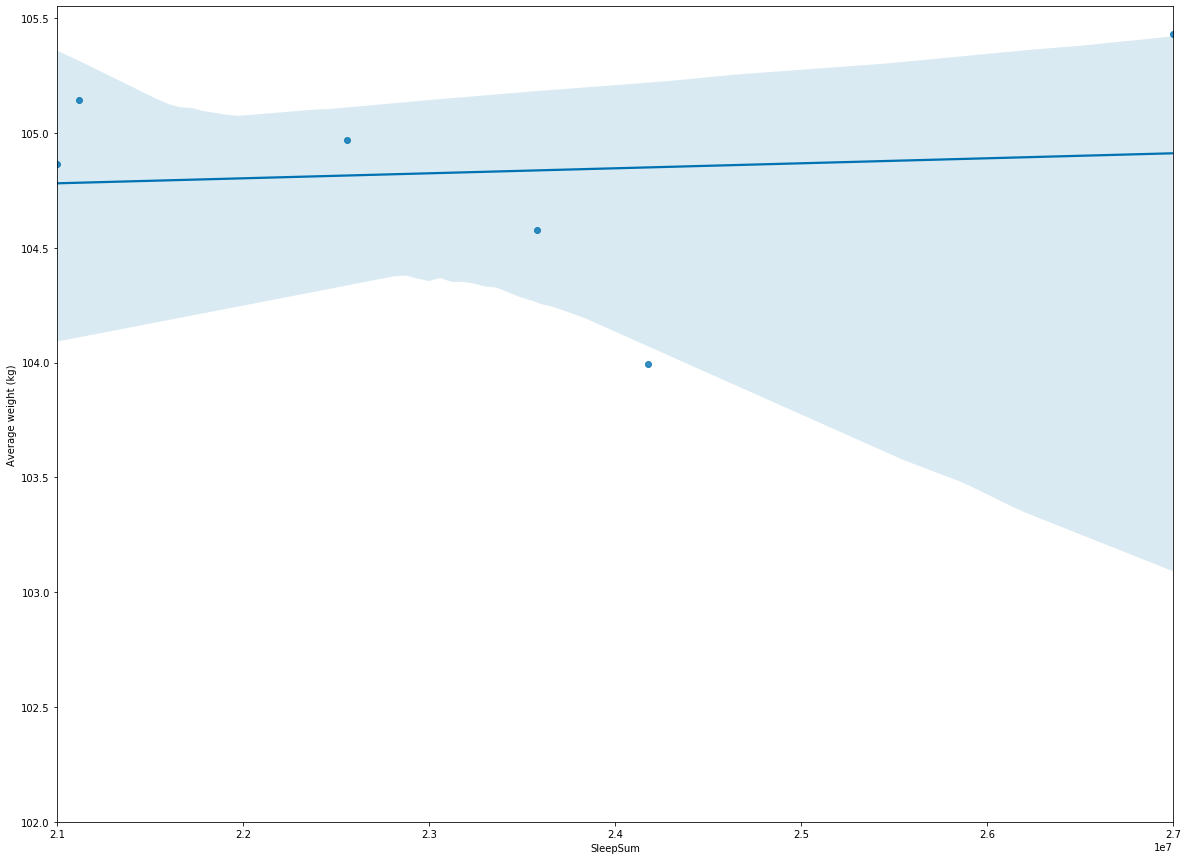

In [373]:
plt.figure(figsize=(20,15))
sns.regplot(x='SleepSum', y='Average weight (kg)', data=df)
plt.ylim(102,)

(0, 120.78501600609978)

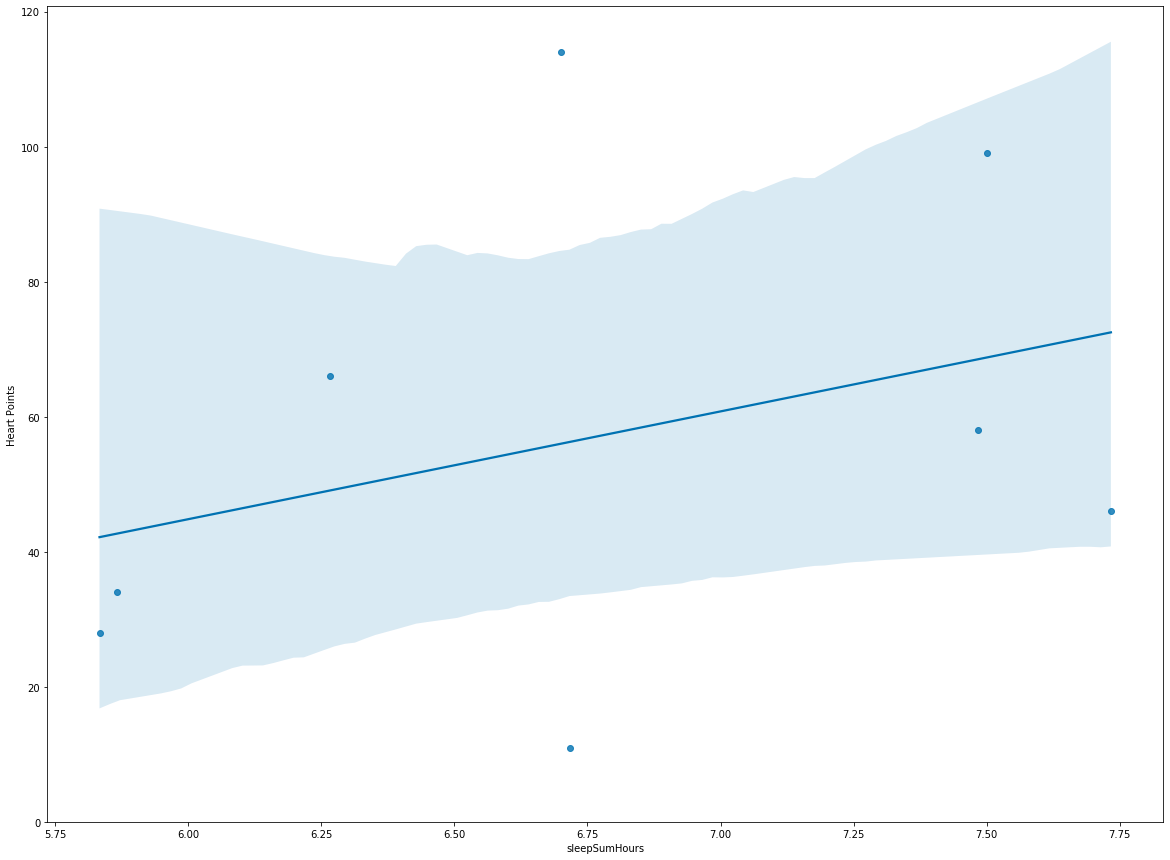

In [374]:
plt.figure(figsize=(20,15))

sns.regplot(x='sleepSumHours', y='Heart Points', data=df)
plt.ylim(0,)